In [31]:
import pandas as pd
import numpy as np
import csv

In [33]:
df_dados = pd.read_csv('df_bsi.csv', sep=',')
df_dados

,ano_ingresso,ultimo_periodo,homem,mulher,ch_cumprida,ch_cumprida_dividida,ch_reprovacao,taxa_reprovacao,semestre_total,semestre_dividido,...,ÉTICA_APROVADO,ÉTICA_REPROVADO,ÉTICA_FALTAS,ÉTICA_NOTA_1.0,ÉTICA_NOTA_2.0,ÉTICA_NOTA_3.0,ÉTICA_MEDIA_FINAL_1.0,ÉTICA_MEDIA_FINAL_2.0,tempo_relativo,status
0,2018,20181,1,0,330,0.18,0.0,0.00,1,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.12,-1
1,2018,20221,1,0,2160,1.18,960.0,0.44,9,1.12,...,1.0,0.0,0.0,9.5,9.0,9.0,9.2,9.2,-1.12,-1
2,2011,20121,1,0,870,0.48,270.0,0.31,3,0.38,...,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,-2.0,-0.38,-1
3,2016,20204,1,0,2310,1.26,540.0,0.23,10,1.25,...,1.0,0.0,0.0,6.5,7.0,9.0,7.5,7.5,1.25,1
4,2020,20204,1,0,240,0.13,0.0,0.00,3,0.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.38,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,2022,20222,1,0,540,0.30,270.0,0.50,2,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,1
676,2016,20204,1,0,2430,1.33,480.0,0.20,11,1.38,...,1.0,0.0,16.0,6.0,9.8,10.0,8.6,8.6,1.38,1
677,2020,20222,1,0,1350,0.74,0.0,0.00,7,0.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.88,1
678,2014,20192,1,0,2670,1.46,630.0,0.24,12,1.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.50,1


Text(0, 0.5, 'Explained variance ratio')

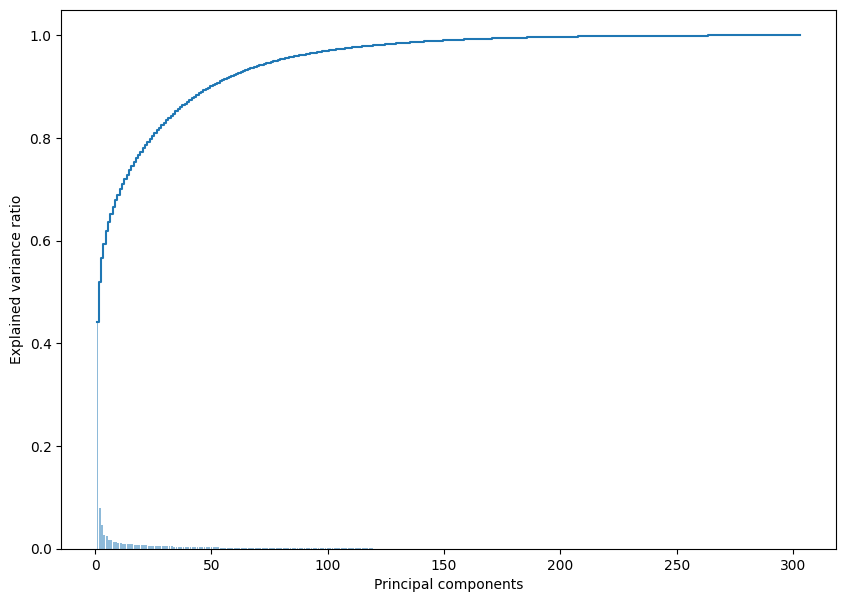

In [35]:
# Importando as Bibliotecas Necessárias
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregando e Preparando os Dados
# Supondo que seu DataFrame é df e não temos variáveis categóricas não numéricas que precisam ser codificadas
df = pd.read_csv('df_bsi.csv', sep=',')

# Remova a variável dependente se estiver presente
if 'nota_final' in df.columns:
    df = df.drop(columns=['nota_final'])

# Padronizando os dados (muito importante para PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicando PCA
# Inicializando o PCA
pca = PCA(n_components=None)  # n_components=None significa que manteremos todos os componentes
df_pca = pca.fit_transform(df_scaled)

# Criando um DataFrame com os componentes principais
pca_columns = [f'PC{i+1}' for i in range(df.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=pca_columns)

# Explicando a Variância
# Variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Plotando a variância explicada
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')


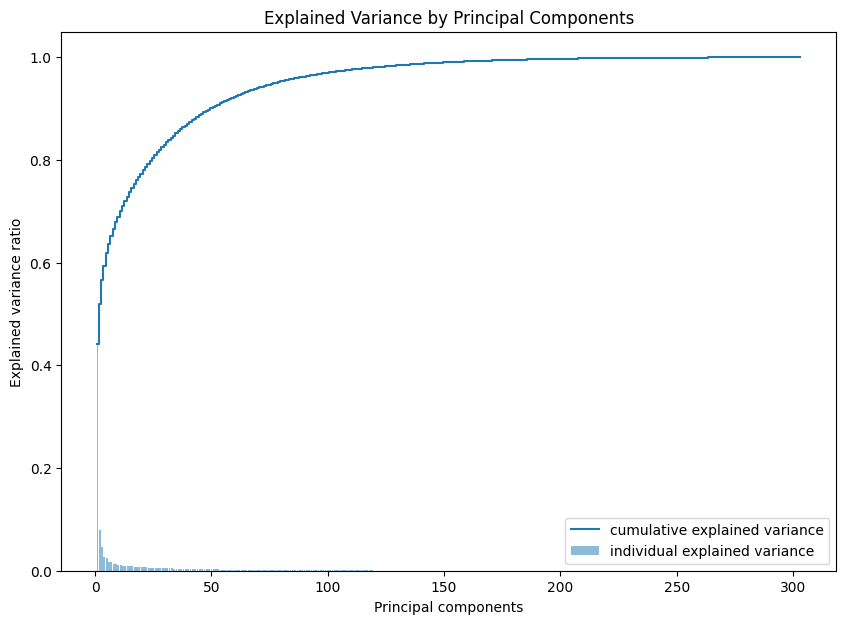

Coeficientes (Loadings) das variáveis para cada componente principal:
                            PC1       PC2       PC3       PC4       PC5  \
ano_ingresso          -0.021703 -0.023535 -0.116069 -0.043106  0.095039   
ultimo_periodo         0.011246 -0.040419 -0.062718 -0.042226  0.102813   
homem                 -0.001186  0.004283 -0.028301 -0.036144 -0.013161   
mulher                 0.001186 -0.004283  0.028301  0.036144  0.013161   
ch_cumprida            0.075875 -0.043097  0.104344  0.004794  0.010675   
...                         ...       ...       ...       ...       ...   
ÉTICA_NOTA_3.0         0.056604  0.005313  0.065334 -0.003817 -0.043070   
ÉTICA_MEDIA_FINAL_1.0  0.054131  0.005867  0.061792 -0.001486 -0.039443   
ÉTICA_MEDIA_FINAL_2.0  0.054778  0.006980  0.059926 -0.004520 -0.038185   
tempo_relativo         0.033836  0.052671 -0.099188 -0.064174  0.063711   
status                 0.048562 -0.003355 -0.099533 -0.051957  0.044510   

                            P

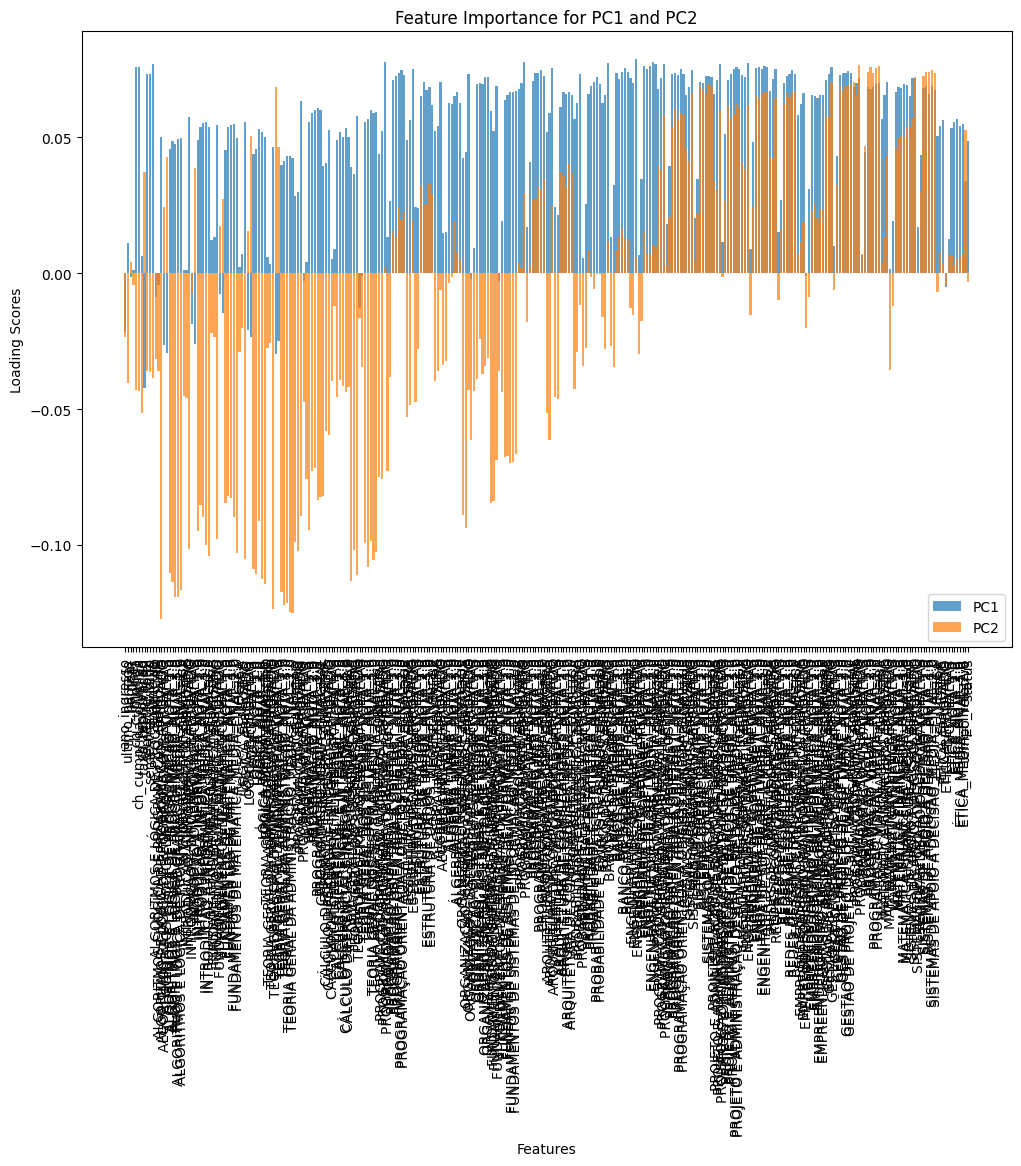

In [36]:
# Importando as Bibliotecas Necessárias
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregando e Preparando os Dados
# Supondo que seu DataFrame é df e não temos variáveis categóricas não numéricas que precisam ser codificadas

# Remova a variável dependente se estiver presente
if 'nota_final' in df.columns:
    df = df.drop(columns=['nota_final'])

# Padronizando os dados (muito importante para PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicando PCA
# Inicializando o PCA
pca = PCA(n_components=None)  # n_components=None significa que manteremos todos os componentes
df_pca = pca.fit_transform(df_scaled)

# Criando um DataFrame com os componentes principais
pca_columns = [f'PC{i+1}' for i in range(df.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=pca_columns)

# Explicando a Variância
# Variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Plotando a variância explicate
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Analisando a Importância das Variáveis
# Coeficientes dos componentes principais
loadings = pca.components_.T

# Criando um DataFrame para facilitar a visualização
loadings_df = pd.DataFrame(loadings, columns=pca_columns, index=df.columns)

# Visualizando as primeiras componentes principais
print("Coeficientes (Loadings) das variáveis para cada componente principal:")
print(loadings_df)

# Para uma visualização mais completa, você pode salvar ou plotar o DataFrame dos loadings
# Plotando os coeficientes das variáveis para as duas primeiras componentes principais
plt.figure(figsize=(12, 8))
plt.bar(loadings_df.index, loadings_df['PC1'], alpha=0.7, label='PC1')
plt.bar(loadings_df.index, loadings_df['PC2'], alpha=0.7, label='PC2')
plt.xlabel('Features')
plt.ylabel('Loading Scores')
plt.title('Feature Importance for PC1 and PC2')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [37]:
colunas_ordenadas = ['ano_ingresso', 'homem', 'mulher', 'ch_cumprida',
                    'ch_cumprida_dividida', 'ch_reprovacao',
                    'taxa_reprovacao', 'semestre_total', 'semestre_dividido', 'matricula',
                    'ALGORITMOS E LÓGICA DE PROGRAMAÇÃO',
                    'ALGORITMOS E LÓGICA DE PROGRAMAÇÃO_SEMESTRE',
                    'ALGORITMOS E LÓGICA DE PROGRAMAÇÃO_APROVADO',
                    'ALGORITMOS E LÓGICA DE PROGRAMAÇÃO_REPROVADO',
                    'ALGORITMOS E LÓGICA DE PROGRAMAÇÃO_FALTAS',
                    'ALGORITMOS E LÓGICA DE PROGRAMAÇÃO_NOTA_1.0',
                    'ALGORITMOS E LÓGICA DE PROGRAMAÇÃO_NOTA_2.0',
                    'ALGORITMOS E LÓGICA DE PROGRAMAÇÃO_NOTA_3.0',
                    'ALGORITMOS E LÓGICA DE PROGRAMAÇÃO_MEDIA_FINAL_1.0',
                    'ALGORITMOS E LÓGICA DE PROGRAMAÇÃO_MEDIA_FINAL_2.0',
                    'INTRODUÇÃO À INFORMÁTICA',
                    'INTRODUÇÃO À INFORMÁTICA_SEMESTRE',
                    'INTRODUÇÃO À INFORMÁTICA_APROVADO',
                    'INTRODUÇÃO À INFORMÁTICA_REPROVADO',
                    'INTRODUÇÃO À INFORMÁTICA_FALTAS',
                    'INTRODUÇÃO À INFORMÁTICA_NOTA_1.0',
                    'INTRODUÇÃO À INFORMÁTICA_NOTA_2.0',
                    'INTRODUÇÃO À INFORMÁTICA_NOTA_3.0',
                    'INTRODUÇÃO À INFORMÁTICA_MEDIA_FINAL_1.0',
                    'INTRODUÇÃO À INFORMÁTICA_MEDIA_FINAL_2.0',
                    'FUNDAMENTOS DE MATEMÁTICA',
                    'FUNDAMENTOS DE MATEMÁTICA_SEMESTRE',
                    'FUNDAMENTOS DE MATEMÁTICA_APROVADO',
                    'FUNDAMENTOS DE MATEMÁTICA_REPROVADO',
                    'FUNDAMENTOS DE MATEMÁTICA_FALTAS',
                    'FUNDAMENTOS DE MATEMÁTICA_NOTA_1.0',
                    'FUNDAMENTOS DE MATEMÁTICA_NOTA_2.0',
                    'FUNDAMENTOS DE MATEMÁTICA_NOTA_3.0',
                    'FUNDAMENTOS DE MATEMÁTICA_MEDIA_FINAL_1.0',
                    'FUNDAMENTOS DE MATEMÁTICA_MEDIA_FINAL_2.0',
                    'LÓGICA',
                    'LÓGICA_SEMESTRE',
                    'LÓGICA_APROVADO',
                    'LÓGICA_REPROVADO',
                    'LÓGICA_FALTAS',
                    'LÓGICA_NOTA_1.0',
                    'LÓGICA_NOTA_2.0',
                    'LÓGICA_NOTA_3.0',
                    'LÓGICA_MEDIA_FINAL_1.0',
                    'LÓGICA_MEDIA_FINAL_2.0',
                    'TEORIA GERAL DA ADMINISTRAÇÃO',
                    'TEORIA GERAL DA ADMINISTRAÇÃO_SEMESTRE',
                    'TEORIA GERAL DA ADMINISTRAÇÃO_APROVADO',
                    'TEORIA GERAL DA ADMINISTRAÇÃO_REPROVADO',
                    'TEORIA GERAL DA ADMINISTRAÇÃO_FALTAS',
                    'TEORIA GERAL DA ADMINISTRAÇÃO_NOTA_1.0',
                    'TEORIA GERAL DA ADMINISTRAÇÃO_NOTA_2.0',
                    'TEORIA GERAL DA ADMINISTRAÇÃO_NOTA_3.0',
                    'TEORIA GERAL DA ADMINISTRAÇÃO_MEDIA_FINAL_1.0',
                    'TEORIA GERAL DA ADMINISTRAÇÃO_MEDIA_FINAL_2.0',
                    'PROGRAMAÇÃO',
                    'PROGRAMAÇÃO_SEMESTRE',
                    'PROGRAMAÇÃO_APROVADO',
                    'PROGRAMAÇÃO_REPROVADO',
                    'PROGRAMAÇÃO_FALTAS',
                    'PROGRAMAÇÃO_NOTA_1.0',
                    'PROGRAMAÇÃO_NOTA_2.0',
                    'PROGRAMAÇÃO_NOTA_3.0',
                    'PROGRAMAÇÃO_MEDIA_FINAL_1.0',
                    'PROGRAMAÇÃO_MEDIA_FINAL_2.0',
                    'CÁLCULO DIFERENCIAL E INTEGRAL',
                    'CÁLCULO DIFERENCIAL E INTEGRAL_SEMESTRE',
                    'CÁLCULO DIFERENCIAL E INTEGRAL_APROVADO',
                    'CÁLCULO DIFERENCIAL E INTEGRAL_REPROVADO',
                    'CÁLCULO DIFERENCIAL E INTEGRAL_FALTAS',
                    'CÁLCULO DIFERENCIAL E INTEGRAL_NOTA_1.0',
                    'CÁLCULO DIFERENCIAL E INTEGRAL_NOTA_2.0',
                    'CÁLCULO DIFERENCIAL E INTEGRAL_NOTA_3.0',
                    'CÁLCULO DIFERENCIAL E INTEGRAL_MEDIA_FINAL_1.0',
                    'CÁLCULO DIFERENCIAL E INTEGRAL_MEDIA_FINAL_2.0',
                    'TEORIA GERAL DOS SISTEMAS',
                    'TEORIA GERAL DOS SISTEMAS_SEMESTRE',
                    'TEORIA GERAL DOS SISTEMAS_APROVADO',
                    'TEORIA GERAL DOS SISTEMAS_REPROVADO',
                    'TEORIA GERAL DOS SISTEMAS_FALTAS',
                    'TEORIA GERAL DOS SISTEMAS_NOTA_1.0',
                    'TEORIA GERAL DOS SISTEMAS_NOTA_2.0',
                    'TEORIA GERAL DOS SISTEMAS_NOTA_3.0',
                    'TEORIA GERAL DOS SISTEMAS_MEDIA_FINAL_1.0',
                    'TEORIA GERAL DOS SISTEMAS_MEDIA_FINAL_2.0',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS I',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS I_SEMESTRE',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS I_APROVADO',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS I_REPROVADO',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS I_FALTAS',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS I_NOTA_1.0',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS I_NOTA_2.0',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS I_NOTA_3.0',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS I_MEDIA_FINAL_1.0',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS I_MEDIA_FINAL_2.0',
                    'ESTRUTURA DE DADOS',
                    'ESTRUTURA DE DADOS_SEMESTRE',
                    'ESTRUTURA DE DADOS_APROVADO',
                    'ESTRUTURA DE DADOS_REPROVADO',
                    'ESTRUTURA DE DADOS_FALTAS',
                    'ESTRUTURA DE DADOS_NOTA_1.0',
                    'ESTRUTURA DE DADOS_NOTA_2.0',
                    'ESTRUTURA DE DADOS_NOTA_3.0',
                    'ESTRUTURA DE DADOS_MEDIA_FINAL_1.0',
                    'ESTRUTURA DE DADOS_MEDIA_FINAL_2.0',
                    'ÁLGEBRA LINEAR',
                    'ÁLGEBRA LINEAR_SEMESTRE',
                    'ÁLGEBRA LINEAR_APROVADO',
                    'ÁLGEBRA LINEAR_REPROVADO',
                    'ÁLGEBRA LINEAR_FALTAS',
                    'ÁLGEBRA LINEAR_NOTA_1.0',
                    'ÁLGEBRA LINEAR_NOTA_2.0',
                    'ÁLGEBRA LINEAR_NOTA_3.0',
                    'ÁLGEBRA LINEAR_MEDIA_FINAL_1.0',
                    'ÁLGEBRA LINEAR_MEDIA_FINAL_2.0',
                    'ORGANIZAÇÃO, SISTEMAS E MÉTODOS',
                    'ORGANIZAÇÃO, SISTEMAS E MÉTODOS_SEMESTRE',
                    'ORGANIZAÇÃO, SISTEMAS E MÉTODOS_APROVADO',
                    'ORGANIZAÇÃO, SISTEMAS E MÉTODOS_REPROVADO',
                    'ORGANIZAÇÃO, SISTEMAS E MÉTODOS_FALTAS',
                    'ORGANIZAÇÃO, SISTEMAS E MÉTODOS_NOTA_1.0',
                    'ORGANIZAÇÃO, SISTEMAS E MÉTODOS_NOTA_2.0',
                    'ORGANIZAÇÃO, SISTEMAS E MÉTODOS_NOTA_3.0',
                    'ORGANIZAÇÃO, SISTEMAS E MÉTODOS_MEDIA_FINAL_1.0',
                    'ORGANIZAÇÃO, SISTEMAS E MÉTODOS_MEDIA_FINAL_2.0',
                    'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO',
                    'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO_SEMESTRE',
                    'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO_APROVADO',
                    'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO_REPROVADO',
                    'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO_FALTAS',
                    'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO_NOTA_1.0',
                    'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO_NOTA_2.0',
                    'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO_NOTA_3.0',
                    'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO_MEDIA_FINAL_1.0',
                    'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO_MEDIA_FINAL_2.0',
                    'PROGRAMAÇÃO WEB',
                    'PROGRAMAÇÃO WEB_SEMESTRE',
                    'PROGRAMAÇÃO WEB_APROVADO',
                    'PROGRAMAÇÃO WEB_REPROVADO',
                    'PROGRAMAÇÃO WEB_FALTAS',
                    'PROGRAMAÇÃO WEB_NOTA_1.0',
                    'PROGRAMAÇÃO WEB_NOTA_2.0',
                    'PROGRAMAÇÃO WEB_NOTA_3.0',
                    'PROGRAMAÇÃO WEB_MEDIA_FINAL_1.0',
                    'PROGRAMAÇÃO WEB_MEDIA_FINAL_2.0',
                    'ARQUITETURA DE COMPUTADORES',
                    'ARQUITETURA DE COMPUTADORES_SEMESTRE',
                    'ARQUITETURA DE COMPUTADORES_APROVADO',
                    'ARQUITETURA DE COMPUTADORES_REPROVADO',
                    'ARQUITETURA DE COMPUTADORES_FALTAS',
                    'ARQUITETURA DE COMPUTADORES_NOTA_1.0',
                    'ARQUITETURA DE COMPUTADORES_NOTA_2.0',
                    'ARQUITETURA DE COMPUTADORES_NOTA_3.0',
                    'ARQUITETURA DE COMPUTADORES_MEDIA_FINAL_1.0',
                    'ARQUITETURA DE COMPUTADORES_MEDIA_FINAL_2.0',
                    'PROBABILIDADE E ESTATÍSTICA',
                    'PROBABILIDADE E ESTATÍSTICA_SEMESTRE',
                    'PROBABILIDADE E ESTATÍSTICA_APROVADO',
                    'PROBABILIDADE E ESTATÍSTICA_REPROVADO',
                    'PROBABILIDADE E ESTATÍSTICA_FALTAS',
                    'PROBABILIDADE E ESTATÍSTICA_NOTA_1.0',
                    'PROBABILIDADE E ESTATÍSTICA_NOTA_2.0',
                    'PROBABILIDADE E ESTATÍSTICA_NOTA_3.0',
                    'PROBABILIDADE E ESTATÍSTICA_MEDIA_FINAL_1.0',
                    'PROBABILIDADE E ESTATÍSTICA_MEDIA_FINAL_2.0',
                    'BANCO DE DADOS',
                    'BANCO DE DADOS_SEMESTRE',
                    'BANCO DE DADOS_APROVADO',
                    'BANCO DE DADOS_REPROVADO',
                    'BANCO DE DADOS_FALTAS',
                    'BANCO DE DADOS_NOTA_1.0',
                    'BANCO DE DADOS_NOTA_2.0',
                    'BANCO DE DADOS_NOTA_3.0',
                    'BANCO DE DADOS_MEDIA_FINAL_1.0',
                    'BANCO DE DADOS_MEDIA_FINAL_2.0',
                    'ENGENHARIA DE SOFTWARE I',
                    'ENGENHARIA DE SOFTWARE I_SEMESTRE',
                    'ENGENHARIA DE SOFTWARE I_APROVADO',
                    'ENGENHARIA DE SOFTWARE I_REPROVADO',
                    'ENGENHARIA DE SOFTWARE I_FALTAS',
                    'ENGENHARIA DE SOFTWARE I_NOTA_1.0',
                    'ENGENHARIA DE SOFTWARE I_NOTA_2.0',
                    'ENGENHARIA DE SOFTWARE I_NOTA_3.0',
                    'ENGENHARIA DE SOFTWARE I_MEDIA_FINAL_1.0',
                    'ENGENHARIA DE SOFTWARE I_MEDIA_FINAL_2.0',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS II',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS II_SEMESTRE',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS II_APROVADO',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS II_REPROVADO',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS II_FALTAS',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS II_NOTA_1.0',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS II_NOTA_2.0',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS II_NOTA_3.0',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS II_MEDIA_FINAL_1.0',
                    'PROGRAMAÇÃO ORIENTADA A OBJETOS II_MEDIA_FINAL_2.0',
                    'SISTEMAS OPERACIONAIS',
                    'SISTEMAS OPERACIONAIS_SEMESTRE',
                    'SISTEMAS OPERACIONAIS_APROVADO',
                    'SISTEMAS OPERACIONAIS_REPROVADO',
                    'SISTEMAS OPERACIONAIS_FALTAS',
                    'SISTEMAS OPERACIONAIS_NOTA_1.0',
                    'SISTEMAS OPERACIONAIS_NOTA_2.0',
                    'SISTEMAS OPERACIONAIS_NOTA_3.0',
                    'SISTEMAS OPERACIONAIS_MEDIA_FINAL_1.0',
                    'SISTEMAS OPERACIONAIS_MEDIA_FINAL_2.0',
                    'PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS',
                    'PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS_SEMESTRE',
                    'PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS_APROVADO',
                    'PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS_REPROVADO',
                    'PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS_FALTAS',
                    'PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS_NOTA_1.0',
                    'PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS_NOTA_2.0',
                    'PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS_NOTA_3.0',
                    'PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS_MEDIA_FINAL_1.0',
                    'PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS_MEDIA_FINAL_2.0',
                    'ENGENHARIA DE SOFTWARE II',
                    'ENGENHARIA DE SOFTWARE II_SEMESTRE',
                    'ENGENHARIA DE SOFTWARE II_APROVADO',
                    'ENGENHARIA DE SOFTWARE II_REPROVADO',
                    'ENGENHARIA DE SOFTWARE II_FALTAS',
                    'ENGENHARIA DE SOFTWARE II_NOTA_1.0',
                    'ENGENHARIA DE SOFTWARE II_NOTA_2.0',
                    'ENGENHARIA DE SOFTWARE II_NOTA_3.0',
                    'ENGENHARIA DE SOFTWARE II_MEDIA_FINAL_1.0',
                    'ENGENHARIA DE SOFTWARE II_MEDIA_FINAL_2.0',
                    'REDES DE COMPUTADORES',
                    'REDES DE COMPUTADORES_SEMESTRE',
                    'REDES DE COMPUTADORES_APROVADO',
                    'REDES DE COMPUTADORES_REPROVADO',
                    'REDES DE COMPUTADORES_FALTAS',
                    'REDES DE COMPUTADORES_NOTA_1.0',
                    'REDES DE COMPUTADORES_NOTA_2.0',
                    'REDES DE COMPUTADORES_NOTA_3.0',
                    'REDES DE COMPUTADORES_MEDIA_FINAL_1.0',
                    'REDES DE COMPUTADORES_MEDIA_FINAL_2.0',
                    'EMPREENDEDORISMO EM INFORMÁTICA',
                    'EMPREENDEDORISMO EM INFORMÁTICA_SEMESTRE',
                    'EMPREENDEDORISMO EM INFORMÁTICA_APROVADO',
                    'EMPREENDEDORISMO EM INFORMÁTICA_REPROVADO',
                    'EMPREENDEDORISMO EM INFORMÁTICA_FALTAS',
                    'EMPREENDEDORISMO EM INFORMÁTICA_NOTA_1.0',
                    'EMPREENDEDORISMO EM INFORMÁTICA_NOTA_2.0',
                    'EMPREENDEDORISMO EM INFORMÁTICA_NOTA_3.0',
                    'EMPREENDEDORISMO EM INFORMÁTICA_MEDIA_FINAL_1.0',
                    'EMPREENDEDORISMO EM INFORMÁTICA_MEDIA_FINAL_2.0',
                    'GESTÃO DE PROJETO DE SOFTWARE',
                    'GESTÃO DE PROJETO DE SOFTWARE_SEMESTRE',
                    'GESTÃO DE PROJETO DE SOFTWARE_APROVADO',
                    'GESTÃO DE PROJETO DE SOFTWARE_REPROVADO',
                    'GESTÃO DE PROJETO DE SOFTWARE_FALTAS',
                    'GESTÃO DE PROJETO DE SOFTWARE_NOTA_1.0',
                    'GESTÃO DE PROJETO DE SOFTWARE_NOTA_2.0',
                    'GESTÃO DE PROJETO DE SOFTWARE_NOTA_3.0',
                    'GESTÃO DE PROJETO DE SOFTWARE_MEDIA_FINAL_1.0',
                    'GESTÃO DE PROJETO DE SOFTWARE_MEDIA_FINAL_2.0',
                    'PROGRAMAÇÃO VISUAL',
                    'PROGRAMAÇÃO VISUAL_SEMESTRE',
                    'PROGRAMAÇÃO VISUAL_APROVADO',
                    'PROGRAMAÇÃO VISUAL_REPROVADO',
                    'PROGRAMAÇÃO VISUAL_FALTAS',
                    'PROGRAMAÇÃO VISUAL_NOTA_1.0',
                    'PROGRAMAÇÃO VISUAL_NOTA_2.0',
                    'PROGRAMAÇÃO VISUAL_NOTA_3.0',
                    'PROGRAMAÇÃO VISUAL_MEDIA_FINAL_1.0',
                    'PROGRAMAÇÃO VISUAL_MEDIA_FINAL_2.0',
                    'MATEMÁTICA FINANCEIRA',
                    'MATEMÁTICA FINANCEIRA_SEMESTRE',
                    'MATEMÁTICA FINANCEIRA_APROVADO',
                    'MATEMÁTICA FINANCEIRA_REPROVADO',
                    'MATEMÁTICA FINANCEIRA_FALTAS',
                    'MATEMÁTICA FINANCEIRA_NOTA_1.0',
                    'MATEMÁTICA FINANCEIRA_NOTA_2.0',
                    'MATEMÁTICA FINANCEIRA_NOTA_3.0',
                    'MATEMÁTICA FINANCEIRA_MEDIA_FINAL_1.0',
                    'MATEMÁTICA FINANCEIRA_MEDIA_FINAL_2.0',
                    'SISTEMAS DE APOIO À DECISÃO',
                    'SISTEMAS DE APOIO À DECISÃO_SEMESTRE',
                    'SISTEMAS DE APOIO À DECISÃO_APROVADO',
                    'SISTEMAS DE APOIO À DECISÃO_REPROVADO',
                    'SISTEMAS DE APOIO À DECISÃO_FALTAS',
                    'SISTEMAS DE APOIO À DECISÃO_NOTA_1.0',
                    'SISTEMAS DE APOIO À DECISÃO_NOTA_2.0',
                    'SISTEMAS DE APOIO À DECISÃO_NOTA_3.0',
                    'SISTEMAS DE APOIO À DECISÃO_MEDIA_FINAL_1.0',
                    'SISTEMAS DE APOIO À DECISÃO_MEDIA_FINAL_2.0',
                    'ÉTICA',
                    'ÉTICA_SEMESTRE',
                    'ÉTICA_APROVADO',
                    'ÉTICA_REPROVADO',
                    'ÉTICA_FALTAS',
                    'ÉTICA_NOTA_1.0',
                    'ÉTICA_NOTA_2.0',
                    'ÉTICA_NOTA_3.0',
                    'ÉTICA_MEDIA_FINAL_1.0',
                    'ÉTICA_MEDIA_FINAL_2.0',
                    'tempo_relativo'
                    #'status'
                      ]
df_dados = df_dados[colunas_ordenadas]
df_dados.to_csv('df_bsi_completo.csv', index=False, sep=',', quoting=csv.QUOTE_NONNUMERIC)

# SVM

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar os dados
df_dados = pd.read_csv('df_bsi_completo.csv', sep=',')  # substitua pelo caminho do seu arquivo

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o classificador SVM
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = classifier.predict(X_test)

# Avaliar a precisão do classificador
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do classificador SVM:", accuracy)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Exibir o relatório de classificação
class_report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(class_report)

KeyError: 'status'

# SVR

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar os dados
df_dados = pd.read_csv('df_bsi_completo.csv', sep=',')

# Separar as variáveis independentes e dependentes
x = df_dados.drop(columns=['tempo_relativo']).to_numpy()
y = df_dados['tempo_relativo'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo SVR
svr_model = SVR(kernel='rbf')  # Kernel RBF é comum para problemas de regressão
svr_model.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = svr_model.predict(x_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro quadrático médio (MSE): {mse:.2f}')
print(f'Coeficiente de determinação (R²): {r2:.2f}')

# Plotar gráfico de dispersão dos resultados esperados vs. preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
plt.title('SVR: Valores reais vs. Valores preditos')
plt.grid(True)
plt.show()


"import pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.svm import SVR\nfrom sklearn.metrics import mean_squared_error, r2_score\nimport matplotlib.pyplot as plt\n\n# Carregar os dados\ndf_dados = pd.read_csv('df_bsi_TR.csv', sep=',')\n\n# Separar as variáveis independentes e dependentes\nx = df_dados.drop(columns=['tempo_relativo']).to_numpy()\ny = df_dados['tempo_relativo'].to_numpy()\n\n# Dividir os dados em conjunto de treinamento e teste\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n\n# Criar e treinar o modelo SVR\nsvr_model = SVR(kernel='rbf')  # Kernel RBF é comum para problemas de regressão\nsvr_model.fit(x_train, y_train)\n\n# Fazer previsões no conjunto de teste\ny_pred = svr_model.predict(x_test)\n\n# Avaliar o modelo\nmse = mean_squared_error(y_test, y_pred)\nr2 = r2_score(y_test, y_pred)\n\nprint(f'Erro quadrático médio (MSE): {mse:.2f}')\nprint(f'Coeficiente de determinação (R²): {r2:.2f}')\n\

# Regressão Logística 

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar os dados
#df_dados = pd.read_csv('df_bsi_teste.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
X = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()


# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de Regressão Logística com o solver liblinear
model = LogisticRegression(max_iter=2000, solver='liblinear', C=1.0)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Validação cruzada
cv_scores = cross_val_score(model, X, y, cv=5)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

Matriz de confusão:
[[102  16]
 [ 17  69]]
Accuracy: 0.8382352941176471
Classification Report:
              precision    recall  f1-score   support

          -1       0.86      0.86      0.86       118
           1       0.81      0.80      0.81        86

    accuracy                           0.84       204
   macro avg       0.83      0.83      0.83       204
weighted avg       0.84      0.84      0.84       204

Cross-Validation Scores: [0.82352941 0.83088235 0.85294118 0.875      0.76470588]
Mean Cross-Validation Score: 0.8294117647058823


# Árvore de Decisão

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar os dados
#df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
X = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Matriz de confusão:
[[98 20]
 [16 70]]
Accuracy: 0.8235294117647058
Classification Report:
              precision    recall  f1-score   support

          -1       0.86      0.83      0.84       118
           1       0.78      0.81      0.80        86

    accuracy                           0.82       204
   macro avg       0.82      0.82      0.82       204
weighted avg       0.83      0.82      0.82       204



# Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar os dados
# = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
X = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Matriz de confusão:
[[100  18]
 [  8  78]]
Accuracy: 0.8725490196078431
Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.85      0.88       118
           1       0.81      0.91      0.86        86

    accuracy                           0.87       204
   macro avg       0.87      0.88      0.87       204
weighted avg       0.88      0.87      0.87       204



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregar os dados
#df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Treinar o modelo de Random Forests
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(x_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)


Matriz de confusão:
[[100  18]
 [  8  78]]
Acurácia: 0.8725490196078431
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.93      0.85      0.88       118
           1       0.81      0.91      0.86        86

    accuracy                           0.87       204
   macro avg       0.87      0.88      0.87       204
weighted avg       0.88      0.87      0.87       204



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregar os dados
#df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Escalar os dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Treinar o modelo de Random Forests
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(x_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)


Matriz de confusão:
[[64 11]
 [ 7 54]]
Acurácia: 0.868
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.90      0.85      0.88        75
           1       0.83      0.89      0.86        61

    accuracy                           0.87       136
   macro avg       0.87      0.87      0.87       136
weighted avg       0.87      0.87      0.87       136



# Naive Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregar os dados
#df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Escalar os dados

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Treinar o modelo de Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

# Fazer previsões
y_pred = nb_model.predict(x_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)


Matriz de confusão:
[[94 24]
 [25 61]]
Acurácia: 0.7598039215686274
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.79      0.80      0.79       118
           1       0.72      0.71      0.71        86

    accuracy                           0.76       204
   macro avg       0.75      0.75      0.75       204
weighted avg       0.76      0.76      0.76       204



# K-Nearest Neighbors

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Carregar os dados
#df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Escalar os dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

# Treinar o modelo de K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Fazer previsões
y_pred = knn_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)


Acurácia: 0.8529411764705882
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.91      0.83      0.87       118
           1       0.79      0.88      0.84        86

    accuracy                           0.85       204
   macro avg       0.85      0.86      0.85       204
weighted avg       0.86      0.85      0.85       204

Matriz de Confusão:
[[98 20]
 [10 76]]


# AdaBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Carregar os dados
#df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Treinar o modelo de AdaBoost com o algoritmo SAMME
adaboost_model = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=42)
adaboost_model.fit(x_train, y_train)

# Fazer previsões
y_pred = adaboost_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)


Acurácia: 0.873
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.90      0.88      0.89       118
           1       0.84      0.86      0.85        86

    accuracy                           0.87       204
   macro avg       0.87      0.87      0.87       204
weighted avg       0.87      0.87      0.87       204

Matriz de Confusão:
[[104  14]
 [ 12  74]]


# Neural Net

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Carregar os dados
#df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Pré-processar os dados: Escalonamento
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Definir e treinar o modelo de rede neural
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(x_train_scaled, y_train)

# Fazer previsões
y_pred = mlp_model.predict(x_test_scaled)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)


Acurácia: 0.887
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.92      0.88      0.90       118
           1       0.85      0.90      0.87        86

    accuracy                           0.89       204
   macro avg       0.88      0.89      0.89       204
weighted avg       0.89      0.89      0.89       204

Matriz de Confusão:
[[104  14]
 [  9  77]]


# QDA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Carregar os dados
#df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Treinar o modelo de QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_train, y_train)

# Fazer previsões
y_pred = qda_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)


Acurácia: 0.701
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.89      0.55      0.68       118
           1       0.60      0.91      0.72        86

    accuracy                           0.70       204
   macro avg       0.74      0.73      0.70       204
weighted avg       0.77      0.70      0.70       204

Matriz de Confusão:
[[65 53]
 [ 8 78]]


/home/wanessa/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Gaussian Process

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Carregar os dados
#df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Definir o modelo de Gaussian Process com um kernel RBF (Radial Basis Function)
kernel = 1.0 * RBF(1.0)
gpc_model = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Treinar o modelo
gpc_model.fit(x_train, y_train)

# Fazer previsões
y_pred = gpc_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)


Acurácia: 0.877
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.90      0.88      0.89       118
           1       0.84      0.87      0.86        86

    accuracy                           0.88       204
   macro avg       0.87      0.88      0.87       204
weighted avg       0.88      0.88      0.88       204

Matriz de Confusão:
[[104  14]
 [ 11  75]]
